# Plot MPMS AC susceptibility data

This notebook visualizes data from low-temperature experiments conducted on an MPMS instrument and exported to MagIC format.

**MPMS AC in phase and out of phase susceptibility vs temperature**

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [12]:
import rockmag as rmag
import pmagpy.contribution_builder as cb
import pmagpy.ipmag as ipmag

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import data

We can take the same approach as in the `rockmag_data_unpack.ipynb` notebook to bring the MagIC data into the notebook as a Contribution. To bring in a different contribution, set the directory path (currently `'./example_data/SSRM2022C'`) and the share key for your MagIC contribution which you can find by clicking on the "Share" button in the MagIC database.

<figure>
  <img src="book/images/MagIC_private_contribution_1.png" alt="Description of the image" width="800">
</figure>

copy the share key highlighted in grey in the following image to the `share_key` variable in the cell below.
<figure>
  <img src="book/images/MagIC_private_contribution_2.png" alt="Description of the image" width="800">
</figure>

**change the directory path and file name in the cell below to load your own data**


In [2]:
# define the path to the folder 
dir_path = 'example_data/SSRM2022C'
# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('20100', directory=dir_path, share_key='6dea85ab-0a90-4e2d-a0dd-426b85123283')
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the measurements table
measurements = contribution.tables['measurements'].df
measurements.dropna(axis=1, how='all')

Download successful. File saved to: example_data/SSRM2022C/magic_contribution_20100.txt
working on:  'contribution'
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/contribution.txt
contribution  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/contribution.txt
working on:  'locations'
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/locations.txt
locations  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/locations.txt
working on:  'sites'
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/sites.txt
sites  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/sites.txt
working on:  'samples'
16  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/samples.txt
samples  data put in  /Users/yimingzhang/Github/Rockma

,dir_dec,dir_inc,experiment,instrument_codes,magn_mass,magn_moment,magn_r2_det,magn_x,magn_y,magn_z,meas_field_ac,meas_field_dc,meas_freq,meas_pos_z,meas_temp,measurement,method_codes,quality,sequence,specimen,standard,susc_chi_mass,susc_chi_qdr_mass,timestamp,treat_ac_field,treat_dc_field,treat_dc_field_phi,treat_dc_field_theta,treat_step_num
measurement name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656-1,NaN,NaN,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,NaN,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,1.00,NaN,9.99,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,1.0,DX1-4r,u,3.660000e-07,-5.430000e-10,2024:05:23:16:36:06.00,NaN,NaN,NaN,NaN,NaN
DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656-2,NaN,NaN,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,NaN,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,10.01,NaN,9.99,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,2.0,DX1-4r,u,3.640000e-07,1.560000e-09,2024:05:23:16:36:06.00,NaN,NaN,NaN,NaN,NaN
DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656-3,NaN,NaN,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,NaN,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,100.06,NaN,9.99,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,3.0,DX1-4r,u,3.610000e-07,1.880000e-09,2024:05:23:16:36:06.00,NaN,NaN,NaN,NaN,NaN
DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656-4,NaN,NaN,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,NaN,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,1.00,NaN,20.00,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,4.0,DX1-4r,u,1.960000e-07,1.340000e-09,2024:05:23:16:36:06.00,NaN,NaN,NaN,NaN,NaN
DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656-5,NaN,NaN,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,NaN,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,10.01,NaN,20.00,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,5.0,DX1-4r,u,1.950000e-07,8.300000e-10,2024:05:23:16:36:06.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan,89.287256,69.154282,DX1-4b-ARM_aniso-LP-AN-ARM-0,IRM-SRM-U,NaN,6.020000e-08,NaN,2.660000e-10,2.140000e-08,5.620000e-08,NaN,NaN,NaN,0.25,NaN,None,LP-AN-ARM,None,NaN,DX1-4b,None,NaN,NaN,2022:06:14:17:01:41.00,0.2,0.00000,0.0,0.0,NaN
nan,89.179101,-46.279529,DA4-1C-ARM_aniso-LP-AN-ARM-0,IRM-SRM-U,NaN,5.570000e-06,NaN,5.510000e-08,3.850000e-06,-4.020000e-06,NaN,NaN,NaN,0.05,NaN,None,LP-AN-ARM,None,NaN,DA4-1C,None,NaN,NaN,2022:06:14:17:09:04.00,0.2,0.00005,-45.0,90.0,NaN
nan,78.668498,-42.932098,DX1-4b-ARM_aniso-LP-AN-ARM-0,IRM-SRM-U,NaN,2.990000e-07,NaN,4.300000e-08,2.150000e-07,-2.040000e-07,NaN,NaN,NaN,0.25,NaN,None,LP-AN-ARM,None,NaN,DX1-4b,None,NaN,NaN,2022:06:14:17:09:25.00,0.2,0.00005,-45.0,90.0,NaN


## The project export contains data from all the experiments

- LP refers to lab protocol
- let's extract the AC susceptibility data measured on the MPMS

In [4]:
measurements.method_codes.unique()

array(['LP-X:LP-X-T:LP-X-F:LP-X-H', 'LP-X:LP-X-T:LP-X-F', 'LP-X-T',
       'LP-HYS', 'LP-BCR-BF', 'LP-FORC', 'LP-FC', 'LP-ZFC',
       'LP-CW-SIRM:LP-MC', 'LP-CW-SIRM:LP-MW', 'LP-DIR-AF', 'LP-AN-ARM',
       'LP-ARM-AFD'], dtype=object)

## Let's filter for the MPMS AC X-T data from your project export

In [11]:
# the .dropna(axis=1, how='all').reset_index(drop=1) code is used to remove columns that are all NaNs and reset the index
XT_measurements = measurements[measurements['method_codes'].str.contains('LP-X:LP-X-T:LP-X-F')].dropna(axis=1, how='all').reset_index(drop=1)
XT_measurements.head()

,experiment,instrument_codes,meas_field_ac,meas_freq,meas_temp,measurement,method_codes,quality,sequence,specimen,standard,susc_chi_mass,susc_chi_qdr_mass,timestamp
0,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,0.0003,1.00,9.99,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,1.0,DX1-4r,u,3.660000e-07,-5.430000e-10,2024:05:23:16:36:06.00
1,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,0.0003,10.01,9.99,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,2.0,DX1-4r,u,3.640000e-07,1.560000e-09,2024:05:23:16:36:06.00
2,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,0.0003,100.06,9.99,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,3.0,DX1-4r,u,3.610000e-07,1.880000e-09,2024:05:23:16:36:06.00
3,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,0.0003,1.00,20.00,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,4.0,DX1-4r,u,1.960000e-07,1.340000e-09,2024:05:23:16:36:06.00
4,IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656,IRM-MPMS3,0.0003,10.01,20.00,DX1-4r-IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-146...,LP-X:LP-X-T:LP-X-F:LP-X-H,g,5.0,DX1-4r,u,1.950000e-07,8.300000e-10,2024:05:23:16:36:06.00


## Now let's select a specimen and its X-T experiment of interest

- One could do multiple rounds of X-T experiments on the same specimen
- so choose in the `first dropdown menu` the specimen of interest
- the choose in the `second dropdown menu` the experiment of interest

In [14]:
# make two drop down ipywidgets for the user to select the sample and the associated experiment
specimen_dropdown = widgets.Dropdown(
    options=XT_measurements['specimen'].unique(),
    description='specimen:',
    disabled=False,
)

experiment_dropdown = widgets.Dropdown(
    options=XT_measurements['experiment'].unique(),
    description='Experiment:',
    disabled=False,
)
# make sure to set the default value of the experiment dropdown to the first experiment in the specimen dropdown
experiment_dropdown.options = XT_measurements[XT_measurements['specimen']==specimen_dropdown.value]['experiment'].unique()

# make sure to update the experiment dropdown based on the specimen selected
def update_experiment(*args):
    experiment_dropdown.options = XT_measurements[XT_measurements['specimen']==specimen_dropdown.value]['experiment'].unique()

specimen_dropdown.observe(update_experiment, 'value')

# display the dropdowns
display(specimen_dropdown, experiment_dropdown)


Dropdown(description='specimen:', options=('DX1-4r', 'DX1-5r'), value='DX1-4r')

Dropdown(description='Experiment:', options=('IRM-MPMS3-LP-X:LP-X-T:LP-X-F:LP-X-H-14656',), value='IRM-MPMS3-L…

In [44]:
def plot_MPMS_AC_X_T(experiment, frequency=None, phase='in'):
    """
    This function plots the AC susceptibility data from the MPMS-X for a given experiment
    
    Parameters
    ----------
    experiment : pandas DataFrame
        The experiment table from the MagIC contribution
    frequency : float
        The frequency of the AC measurement in Hz
    phase : str
        The phase of the AC measurement ('in' or 'out')
    """
    assert phase in ['in', 'out'], 'phase should be either "in" or "out"'
    assert frequency is None or frequency in experiment['frequency'].unique(), 'frequency should be one of the available frequencies'

    if frequency is None:
        # that means we will plot all frequencies
        meas_freqs = experiment['meas_freq'].unique()
    else:
        meas_freqs = [frequency]
    
    fig, ax = plt.subplots(figsize=(6,6))
    for meas_freq in meas_freqs:
        data = experiment[(experiment['meas_freq']==meas_freq)]
        # plot the data
        if phase == 'in':
            ax.plot(data['meas_temp'], data['susc_chi_mass'], 'o-', label=f'{meas_freq} Hz')
        else:
            ax.plot(data['meas_temp'], data['susc_chi_qdr_mass'], 'o-', label=f'{meas_freq} Hz')

    ax.set_xlabel('Temperature (K)', fontsize=16)
    ax.set_ylabel('$m^3/kg$', fontsize=16)
    ax.set_title('AC Susceptibility '+phase+' phase', fontsize=16)
    ax.legend()
    return ax


In [46]:
selected_experiment = XT_measurements[(XT_measurements['specimen']==specimen_dropdown.value) & 
                                      (XT_measurements['experiment']==experiment_dropdown.value)].reset_index(drop=1)


<AxesSubplot:title={'center':'AC Susceptibility in phase'}, xlabel='Temperature (K)', ylabel='$m^3/kg$'>

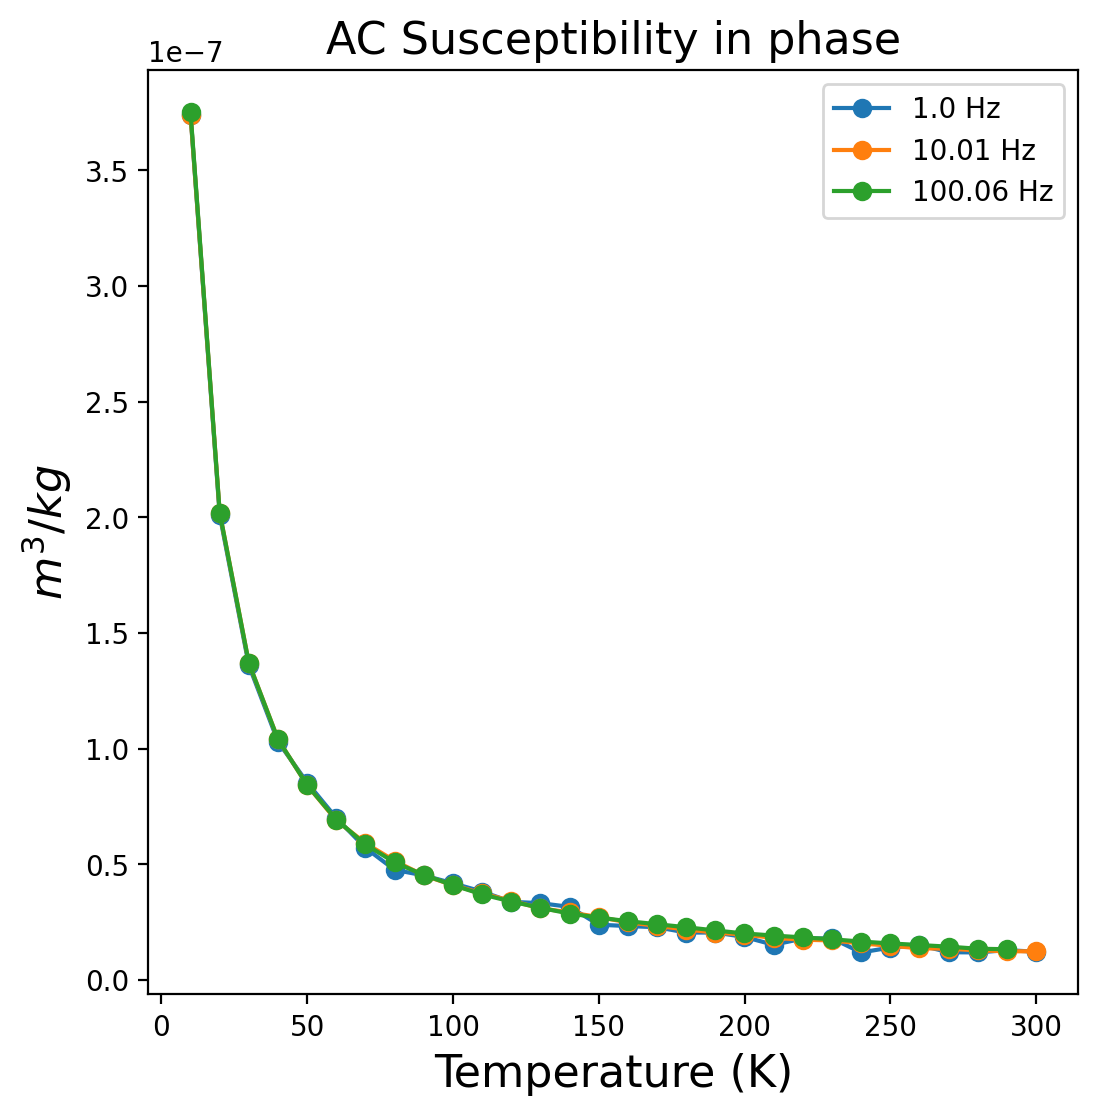

In [47]:
plot_MPMS_AC_X_T(selected_experiment, phase='in')

## save the data

- you can put the name of the file (including its directory relative to this notebook) in the text box below 
- the click the `Save data` button to save the data
- the available file formats for figures are: 

`eps`: 'Encapsulated Postscript', 

`jpg`: 'Joint Photographic Experts Group', 

`jpeg`: 'Joint Photographic Experts Group',

`pdf`: 'Portable Document Format', 

`pgf`: 'PGF code for LaTeX', 

`png`: 'Portable Network Graphics', 

`ps`: 'Postscript', 

`raw`: 'Raw RGBA bitmap', 

`rgba`: 'Raw RGBA bitmap', 

`svg`: 'Scalable Vector Graphics', 

`svgz`: 'Scalable Vector Graphics', 

`tif`: 'Tagged Image File Format'

`tiff`: 'Tagged Image File Format'

**but just do pdf, png, or jpg**

In [49]:
# now let's make an ipywitgets text box and a button for saving the plot to a given directory and file name 
output_text = widgets.Text(
    value='output.png',
    placeholder='output.png',
    description='Output file:',
    disabled=False
)

save_button = widgets.Button(
    description='Save Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Save the plot',
    icon='save' # (FontAwesome names without the `fa-` prefix)
)

out = widgets.Output()
def save_plot(b):
    with out:
        out.clear_output(wait=True)
    ax = rmag.plot_MPMS_AC_X_T(selected_experiment)
    plt.savefig(output_text.value)
    plt.show()
    
save_button.on_click(save_plot)

display(output_text, save_button)



Text(value='output.png', description='Output file:', placeholder='output.png')

Button(description='Save Plot', icon='save', style=ButtonStyle(), tooltip='Save the plot')